<a href="https://colab.research.google.com/github/Faiqulilmi16/Thesis/blob/main/Klasifikasi_Agreeableness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install PyDrive

In [ ]:
!pip install PyDrive

# Import Google Drive

In [ ]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
download = drive.CreateFile({'id': '1hLoPMYCuURYXYNGrwy1YUeBiZOw31OR7'})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!unzip "/content/drive/MyDrive/Datatrain4.zip"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/Datatrain4.zip
   creating: Datatrain4/A/
 extracting: Datatrain4/A/datatrain001.png  
 extracting: Datatrain4/A/datatrain002.png  
  inflating: Datatrain4/A/datatrain003.png  
  inflating: Datatrain4/A/datatrain004.png  
  inflating: Datatrain4/A/datatrain005.png  
  inflating: Datatrain4/A/datatrain006.png  
  inflating: Datatrain4/A/datatrain007.png  
  inflating: Datatrain4/A/datatrain008.png  
 extracting: Datatrain4/A/datatrain009.png  
  inflating: Datatrain4/A/datatrain010.png  
  inflating: Datatrain4/A/datatrain011.png  
  inflating: Datatrain4/A/datatrain012.png  
  inflating: Datatrain4/A/datatrain013.png  
  inflating: Datatrain4/A/datatrain014.png  
  inflating: Datatrain4/A/datatrain015.png  
  inflating: Datatrain4/A/datatrain016.png  
  inflating: Datatrain4/A/datatrain017.png  
  inflating: Datatrain4/A/datat

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

# Import Label .CSV

In [ ]:
train_labels = pd.read_csv('/content/Datatrain4/agreeableness.csv')
train_labels.head()

,id,labels,Rendah,Sedang,Tinggi
0,datatrain001,"[""Sedang""]",0,1,0
1,datatrain002,"[""Tinggi""]",0,0,1
2,datatrain003,"[""Tinggi""]",0,0,1
3,datatrain004,"[""Tinggi""]",0,0,1
4,datatrain005,"[""Tinggi""]",0,0,1


In [ ]:
train_labels.columns

Index(['id', 'labels', 'Rendah', 'Sedang', 'Tinggi'], dtype='object')

# Merubah Data Gambar Menjadi Array

In [ ]:
train_image = []
for i in tqdm(range(train_labels.shape[0])):
    img = image.load_img('Datatrain4/A/'+train_labels['id'][i]+'.png',target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 105/105 [00:00<00:00, 572.65it/s]


In [ ]:
X.shape

(105, 200, 200, 3)

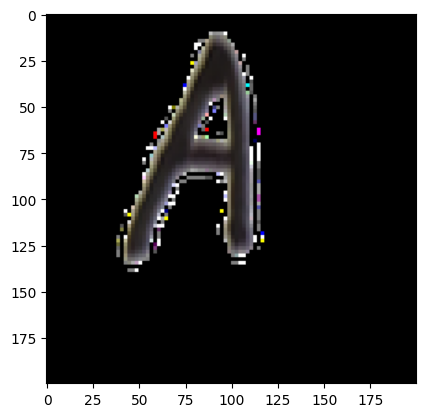

In [ ]:
plt.imshow(X[1])

# Split Data

In [ ]:
y = np.array(train_labels.drop(['id', 'labels'],axis=1))
y.shape

(105, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Membangun Model

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 196, 196, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 98, 98, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 94, 94, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 47, 47, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 43, 43, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 17, 17, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 700,643 (2.67 MB)

 Trainable params: 700,643 (2.67 MB)

 Non-trainable params: 0 (0.00 B)

# Melakukan Training Data

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers

f1_metric = tf.keras.metrics.F1Score(average='macro')

# Use the Adam optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',f1_metric, tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])


In [ ]:
from tensorflow.keras.callbacks import Callback

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=2, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    batch_size=32)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.8143 - f1_score: 0.2992 - loss: 0.7205 - precision_2: 0.6842 - recall_2: 0.7967 - val_accuracy: 0.8125 - val_f1_score: 0.2989 - val_loss: 0.6727 - val_precision_2: 0.8125 - val_recall_2: 0.8125
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.7654 - f1_score: 0.2890 - loss: 0.6961 - precision_2: 0.6719 - recall_2: 0.7107 - val_accuracy: 0.8125 - val_f1_score: 0.2989 - val_loss: 0.5800 - val_precision_2: 0.8125 - val_recall_2: 0.8125
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.8094 - f1_score: 0.2982 - loss: 0.6208 - precision_2: 0.7099 - recall_2: 0.8211 - val_accuracy: 0.8125 - val_f1_score: 0.2989 - val_loss: 0.5218 - val_precision_2: 0.8125 - val_recall_2: 0.8125
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.8250 - f1_score: 0.3233 - loss: 0.6430 - precision_2: 0.6620 - recall_2: 0.8436 - val_accuracy: 0.8125 - val_f1_score: 0.2989 - val_loss: 0.5173 - val_precision_2: 0.8125 - 

# Melakukan Prediksi

In [ ]:
img = image.load_img('/content/drive/MyDrive/Datatest/A/datatest10.png',target_size=(200,200,3))
img = image.img_to_array(img)
img = img/255

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Tinggi (0.773)


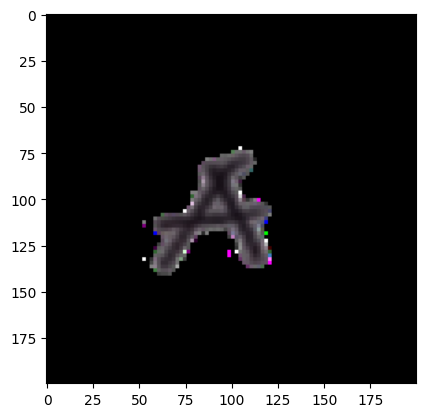

In [ ]:
classes = np.array(train_labels.columns[2:])
proba = model.predict(img.reshape(1,200,200,3))
top_1 = np.argsort(proba[0])[:-2:-1]
for i in range(1):
    print("{}".format(classes[top_1[i]])+" ({:.3})".format(proba[0][top_1[i]]))
plt.imshow(img)